# Programming for Data Science and Artificial Intelligence

## 3. Pandas

Pandas is a newer package **built on top of NumPy**, and provides an efficient implementation of a DataFrame.

DataFrames are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data

Offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks and spreadsheet programs

Although NumPy ndarray data structure provides essential features, its limitations become clear when we need more flexibility (e.g., attaching labels to data, working with missing data, etc.) 

Pandas provides efficient access to these sorts of "data munging" tasks that occupy much of a data scientist's time.

In [1]:
import pandas as pd
pd.__version__

'1.0.3'

## Series

A Pandas <code>Series</code> is a one-dimensional array of indexed data. It can be created from a list or array as follows:

In [2]:
#creating a series from list
data_pd = pd.Series([0.25, 0.5, 0.75, 1.0])
print("Pandas series from list: ", data_pd)

#creating a series from numpy array
import numpy as np
numpy_arr = np.arange(5)
data_pd = pd.Series(numpy_arr)
print("Pandas series from numpy array: ", data_pd)  #notice default index

#attributes
print("Data values: ", data_pd.values)  #numpy array 
print("Data index: ", data_pd.index)  #range index is pandas object

#indexing
print("Data[1]: ", data_pd[1])
print("Data[-2:]: ", data_pd[-2:])  #slicing still works

#index is explicitly defined!  Unlike numpy which is implicitly defined
#errors, no index of -1
# print("Data[-1]: ", data_pd[-1])  #you can provide index to pd.Series for this to work

#integer indexing is nasty!  try change to letters
data_pd = pd.Series([0.25, 0.5, 0.75, 1.0], 
                    index=['a', 'b', 'c', 'd'])

print("Data[-1]: ", data_pd[-1])  #you can provide index to pd.Series for this to work

#for example, index need not be integer
index = ['a', 'b', 'c', 'd', 3]
data_pd = pd.Series(numpy_arr, index = index)
print("Index['a']: ", data_pd['a'])
print("Index[3]: ", data_pd[3])  #3 is not position three but index 3!

#since pandas index system looks like dictionary, it is no surprise
#that pandas can be created from dictionary, see this:
some_population_dict = {'Chiangrai': 11111, 
                        'Pathum Thani': 22222,
                        'Bangkok': 33333,
                        'Chiangmai': 44444}
data_pd = pd.Series(some_population_dict)
print("Population['Bangkok']: ", data_pd['Bangkok'])

#also supports slicing!  Notice that Chiangmai is being included as well!
print("Population['Pathumthan':'Chiangmai']: ", data_pd['Pathum Thani': 'Chiangmai'])

#data can be scalar, which is repeated to fill the specified index
data_pd = pd.Series(5, index=[2, 3, 8])
print("Data pd scalar: ", data_pd)

Pandas series from list:  0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64
Pandas series from numpy array:  0    0
1    1
2    2
3    3
4    4
dtype: int64
Data values:  [0 1 2 3 4]
Data index:  RangeIndex(start=0, stop=5, step=1)
Data[1]:  1
Data[-2:]:  3    3
4    4
dtype: int64
Data[-1]:  1.0
Index['a']:  0
Index[3]:  4
Population['Bangkok']:  33333
Population['Pathumthan':'Chiangmai']:  Pathum Thani    22222
Bangkok         33333
Chiangmai       44444
dtype: int64
Data pd scalar:  2    5
3    5
8    5
dtype: int64


## Dataframe

DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names.  DataFrame as a sequence of aligned Series objects.

In [3]:
#create dataframe with two dict
some_population_dict = {'Chiangrai': 11111, 
                        'Pathum Thani': 22222,
                        'Bangkok': 33333,
                        'Chiangmai': 44444}
some_area_dict = {'Chiangrai': 999, 
                'Pathum Thani': 888,
                'Bangkok': 777,
                'Chiangmai': 666,
                 'Syria': 333}
states = pd.DataFrame({'population': some_population_dict,
                       'area': some_area_dict})
print("Everything: ")
print(states)

print("Only Chiangrai to Bangkok: ")
print(states['Chiangrai': 'Bangkok'])

print("Only population column: ")
print(states['Chiangrai': 'Bangkok']['population'])
print(states['population']['Chiangrai': 'Bangkok'])  #order does not matter; imagine as drill down
# print(states['population']['Chiangrai': 'Bangkok']['area']) #error, since area is gone already

print("Only area column with everything")
print(states['area'])  #first way
print(states[:]['area']) #second way

#attributes
print("Index: ", states.index)  #pandas index object
print("Index[-1]: ", states.index[-1])  #pandas index object is similar to numpy array
print("Columns: ", states.columns)  #pandas index object
print("Columns[0:1]: ", states.columns[0:1]) #notice how 1 is not included

#many other ways to create panda dataframe

#from series
population_series = pd.Series(some_population_dict)
pd_from_series = pd.DataFrame(population_series, columns=['population'])  #since it's series, we need to pass column name, if not, it will be named 0
print("PD from series: ", pd_from_series)

#from list of dicts
data = [{'a': i, 'b': 2 * i} for i in range(3)]
pd_from_list_dict = pd.DataFrame(data, index=[1, 2, 3])
print("PD from list of dict: ", pd_from_list_dict)

#from 2D numpy array
data_numpy = np.random.rand(3, 2)
index = ['a', 'b', 'c']
columns = ['foo', 'bar']
pd_from_numpy = pd.DataFrame(data_numpy, index=index, columns=columns)
print("PD from numpy: ", pd_from_numpy)

Everything: 
              population  area
Chiangrai        11111.0   999
Pathum Thani     22222.0   888
Bangkok          33333.0   777
Chiangmai        44444.0   666
Syria                NaN   333
Only Chiangrai to Bangkok: 
              population  area
Chiangrai        11111.0   999
Pathum Thani     22222.0   888
Bangkok          33333.0   777
Only population column: 
Chiangrai       11111.0
Pathum Thani    22222.0
Bangkok         33333.0
Name: population, dtype: float64
Chiangrai       11111.0
Pathum Thani    22222.0
Bangkok         33333.0
Name: population, dtype: float64
Only area column with everything
Chiangrai       999
Pathum Thani    888
Bangkok         777
Chiangmai       666
Syria           333
Name: area, dtype: int64
Chiangrai       999
Pathum Thani    888
Bangkok         777
Chiangmai       666
Syria           333
Name: area, dtype: int64
Index:  Index(['Chiangrai', 'Pathum Thani', 'Bangkok', 'Chiangmai', 'Syria'], dtype='object')
Index[-1]:  Syria
Columns:  Index(['p

## Indexing/Slicing/Fancy Indexing
### Series

In [4]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index = ['a', 'b', 'c', 'd'])

print("Data: ", data)

#explicit index
print("Explicit index: ", data['b'])

#also support implicit index, since we define index
print("Implicit index: ", data[-1])

#extend series by assigning new index value
data['e'] = 99
print("Data with e: ", data)

#use in
print("a in data?: ", 'a' in data)  #access keys

#keys()
print("All keys: ", data.keys()) #pandas index object

#items()
print("All items: ", list(data.items())) #zip object

#values()
print("All values: ", data.values) #numpy array object

#slicing with explicit index (include c)
print("Data['a':'c']: ", data['a':'c'])

#slicing with implicit index (exclude 2)
print("Data[0:2]: ", data[0:2])

#masking
print("Data[(data > 0.3) & (data < 0.8)]: ", data[(data>0.3) & (data < 0.8)])

#fancy indexing
print("Data[['a', 'e']]: ", data[['a', 'e']])

#some precaution on the possible confusion if you use explicit integer index
#use explicit index when indexing
data = pd.Series(['a', 'b', 'c'], index=(1, 3, 5))
print("Data[1]: ", data[1])

#use implicit index when slicing
print("Data[1:3]: ", data[1:3])

#due to this possible confusion due to explicit integer index, pandas
#provide loc and iloc
#loc uses explicit index
print("Data loc [1]: ", data.loc[1])
print("Data loc [1:3]: ", data.loc[1:3])  #include 3 as well

#iloc uses implicit index
print("Data iloc [1]: ", data.iloc[1])
print("Data iloc [1:3]: ", data.iloc[1:3])  #does not include 3

#always use iloc for implicit index, for no unnecessary confusion!

Data:  a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
Explicit index:  0.5
Implicit index:  1.0
Data with e:  a     0.25
b     0.50
c     0.75
d     1.00
e    99.00
dtype: float64
a in data?:  True
All keys:  Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
All items:  [('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0), ('e', 99.0)]
All values:  [ 0.25  0.5   0.75  1.   99.  ]
Data['a':'c']:  a    0.25
b    0.50
c    0.75
dtype: float64
Data[0:2]:  a    0.25
b    0.50
dtype: float64
Data[(data > 0.3) & (data < 0.8)]:  b    0.50
c    0.75
dtype: float64
Data[['a', 'e']]:  a     0.25
e    99.00
dtype: float64
Data[1]:  a
Data[1:3]:  3    b
5    c
dtype: object
Data loc [1]:  a
Data loc [1:3]:  1    a
3    b
dtype: object
Data iloc [1]:  b
Data iloc [1:3]:  3    b
5    c
dtype: object


### DataFrame

In [5]:
some_population_dict = {'Chiangrai': 11111, 
                        'Pathum Thani': 22222,
                        'Bangkok': 33333,
                        'Chiangmai': 44444}
some_area_dict = {'Chiangrai': 999, 
                'Pathum Thani': 888,
                'Bangkok': 777,
                'Chiangmai': 666,
                 'Syria': 333}
data = pd.DataFrame({'pop': some_population_dict,
                       'area': some_area_dict})

print("==data==")
print(data)

#dataframe can be accessed via dictionary style indexing
print("==Area==")
print(data['area'])

#we can also use attribute-style
print("==Area using attributes==")
print(data.area)
print("Data area is same: ", data.area is data['area'])

#However!!, keep in mind that attribute style does not always work
#for example, pop is a method, thus data.pop will point to some method instead
print("==Do not use .pop!==")
print("Some pop method: ", data.pop)
print("Data pop not the same: ", data.pop is data['pop'])

#reminder, index is columns, not index!
# print("Data['Chiangrai'] error: ", data['Chiangrai'])

#best practice is to use ['key'] style!

#feature engineer easily
print("==Feature engineering with density==")
data['density'] = data['pop'] / data['area']
print(data)

#we cannot use data[0] since we do not have explicit index called 0, use iloc instead
print("==First row using iloc==")
print(data.iloc[0])

print("==First three rows, first two columns using iloc==")
print(data.iloc[:3, :2])

#use loc for explicit index
print("==Use loc for explicit index")
print(data.loc[:'Bangkok', :'pop'])

#chaining is possible for combine
print("==chain iloc and loc==")
print(data.loc[:'Bangkok'].iloc[:, :2])

#more advanced: masking + fancy
print("==masking + fancy==")
print(data.loc[data.density > 20, ['pop', 'density']])

#first row, second column, change value to 90
data.iloc[0, 2] = 90
print("==Changing value==")
print(data)

###some really important convention to keep in mind###
#1.  indexing refers to columns, while slicing refer to rows
print("==Indexing refer to columns==")
print(data['pop'])
#print(data['Chiangrai']) error

print("==Slicing refer to rows==")
print(data['Chiangrai': 'Pathum Thani']) #include Pathum Thani
#print(data['pop': 'area']) error

print("==Slicing can also use implicit integers==")
print(data[1:3])  #not including 3

print("==masking are done row-wise==")
print(data[data.density > 20])


==data==
                  pop  area
Chiangrai     11111.0   999
Pathum Thani  22222.0   888
Bangkok       33333.0   777
Chiangmai     44444.0   666
Syria             NaN   333
==Area==
Chiangrai       999
Pathum Thani    888
Bangkok         777
Chiangmai       666
Syria           333
Name: area, dtype: int64
==Area using attributes==
Chiangrai       999
Pathum Thani    888
Bangkok         777
Chiangmai       666
Syria           333
Name: area, dtype: int64
Data area is same:  True
==Do not use .pop!==
Some pop method:  <bound method NDFrame.pop of                   pop  area
Chiangrai     11111.0   999
Pathum Thani  22222.0   888
Bangkok       33333.0   777
Chiangmai     44444.0   666
Syria             NaN   333>
Data pop not the same:  False
==Feature engineering with density==
                  pop  area    density
Chiangrai     11111.0   999  11.122122
Pathum Thani  22222.0   888  25.024775
Bangkok       33333.0   777  42.899614
Chiangmai     44444.0   666  66.732733
Syria         

## Broadcasting

In [6]:
import pandas as pd
import numpy as np

rng = np.random.RandomState(42)
df = pd.DataFrame(rng.randint(0, 10, (3, 4)), 
                 columns = ['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,3,7,4
1,6,9,2,6
2,7,4,3,7


In [7]:
#broadcasting
df_new = np.sin(df * np.pi / 4) 
df_new

#index alignment
area = pd.Series({'Alaska': 111, 'Texas': 222,
                 'California': 333}, name = 'area')
population = pd.Series({'California' : 999, 'Texas': 888,
                       'New York': 777}, name = 'population')

#as you can see, any missing value will be replaced with NaN
print("==population / area==")
print(population / area)

#similarly
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
print("==A + B==")
print(A + B)

#we can use fill_value params in pd.add(pd)
print("==A.add(B, fill_value=0)==")  #any missing Nan values will be replaced with 0
print(A.add(B, fill_value = 0))

#Operation between df and series
#common operation is to find difference  of the entire df with one row or column
A = rng.randint(10, size = (3, 4))
df = pd.DataFrame(A, columns=list('QRST'))
print("==df==")
print(df)

#just simple question, why cannot we do df[0]
#print(df[0])  #by default, indexing access column wise

print("==df-df.iloc[0]==")
print(df - df.iloc[0])

print("==column-wise==")  #cannot do - , since default is row-wise
print(df.subtract(df['R'], axis=0))

==population / area==
Alaska        NaN
California    3.0
New York      NaN
Texas         4.0
dtype: float64
==A + B==
0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64
==A.add(B, fill_value=0)==
0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64
==df==
   Q  R  S  T
0  7  2  5  4
1  1  7  5  1
2  4  0  9  5
==df-df.iloc[0]==
   Q  R  S  T
0  0  0  0  0
1 -6  5  0 -3
2 -3 -2  4  1
==column-wise==
   Q  R  S  T
0  5  0  3  2
1 -6  0 -2 -6
2  4  0  9  5


## Handling missing data

In [71]:
#None
#Because it is a Python object, None cannot be used in any arbitrary 
#NumPy/Pandas array, but only in arrays with data type 'object' 
#(i.e., arrays of Python objects):

import numpy as np
import pandas as pd

vals = np.array([1, None, 3, 4])
vals

#typically, we do not use None, since it uses a lot of overhead
# for dtype in ['object', 'int']:
#     print("dtype=", dtype)
#     %timeit np.arange(1000, dtype=dtype).sum()
    
#in addition, you cannot perform aggregations like sum() or min() with
#array containing None
# vals.sum()

#instead, it is encouraged to use np.nan to represent null values
print("Type of np.nan: ", type(np.nan))
print("Np nan - 1: ", np.nan - 1) #any operation with nan is nan

vals2 = np.array([1, np.nan, 3, 4])
print("Sum: ", vals2.sum())
print("Nansum: ", np.nansum(vals2))
print("Nanmin: ", np.nanmin(vals2))
print("Nanmax: ", np.nanmax(vals2))

#Create a pd series.  Automatically convert None to np.nan, if other values are integers or float
dfs = pd.Series([1, None, np.nan])
print("Pandas automatically convert None to nans")
print(dfs)

dfs = pd.Series(["Hello", None, np.nan])
print("Pandas do not, since String is object")
print(dfs)

dfs = pd.Series([True, None, np.nan])
print("Pandas do not, cast Boolean to object")
print(dfs)

#pandas treat None and np.nan interchangeably
#isnull() - check any missing values
#notnull() - opposite of isnull()
#dropna() - drop all null and return the filtered version
#fillna() - fill all null with some values
dfs = pd.Series([1, np.nan, "hello", None])
print("Is null: ", dfs.isnull())

print("==Only data not null==")
print(dfs[dfs.notnull()])

print("==Drop all na==")
print(dfs.dropna())  #this is not in place!
print(dfs)  #this will bring back the old copy

#drop columns with na, use axis = 1
df = pd.DataFrame([[1, np.nan, 2],
                  [2, 3, 5],
                  [np.nan, 4, np.nan],
                  [4, np.nan, np.nan]])

print(df.dropna(axis=1))  #default is axis = 0

#drop columns, if all values is nan
df[3] = np.nan  #create new column
print(df.dropna(axis=1, how="all"))

#most of the time, if you have missing values, it is advised
#to drop them simply.  This is against many opinions.  However,
#the case is that:
#When you replace missing value with mean, you lower the variance
#When you replace with median, you also lower the variance
#when you replace with some value, you introduce noise
#but first, let's see how to replace value
print("==Fill na with 0==")
print(df.fillna(0))  #not in place, reminders!

print("==Fill all na with mean==")
print(df.fillna(df.mean()))

print("replace df.mean() for col 1 with in place")
df[1].fillna(df[1].mean(), inplace=True)  #this is in place!
print(df)

print("==Interpolate==")
print(df.interpolate(method='values'))

Type of np.nan:  <class 'float'>
Np nan - 1:  nan
Sum:  nan
Nansum:  8.0
Nanmin:  1.0
Nanmax:  4.0
Pandas automatically convert None to nans
0    1.0
1    NaN
2    NaN
dtype: float64
Pandas do not, since String is object
0    Hello
1     None
2      NaN
dtype: object
Pandas do not, cast Boolean to object
0    True
1    None
2     NaN
dtype: object
Is null:  0    False
1     True
2    False
3     True
dtype: bool
==Only data not null==
0        1
2    hello
dtype: object
==Drop all na==
0        1
2    hello
dtype: object
0        1
1      NaN
2    hello
3     None
dtype: object
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]
     0    1    2
0  1.0  NaN  2.0
1  2.0  3.0  5.0
2  NaN  4.0  NaN
3  4.0  NaN  NaN
==Fill na with 0==
     0    1    2    3
0  1.0  0.0  2.0  0.0
1  2.0  3.0  5.0  0.0
2  0.0  4.0  0.0  0.0
3  4.0  0.0  0.0  0.0
==Fill all na with mean==
          0    1    2   3
0  1.000000  3.5  2.0 NaN
1  2.000000  3.0  5.0 NaN
2  2.333333  4.0  3.5 NaN
3  4.000000  3.5  3.5 N

## Concatenating Datasets

In [9]:
#dataframe concatenation
data_numpy = np.random.rand(3, 2)  #shape 3, 2
index = ['Bangkok', 'Chiangmai', 'Samut Prakan']
columns = ['Population', 'Area']
pd_from_numpy = pd.DataFrame(data_numpy, index=index, columns=columns)
print("==First dataframe==")
print(pd_from_numpy)

data_numpy2 = np.random.rand(4, 3)
index2 = ['Bangkok', 'Chiangmai', 'Samut Prakan', 'Pathum Thani']
columns2 = ['HDI', 'Temperature', 'GDP']
pd_from_numpy2 = pd.DataFrame(data_numpy2, index=index2, columns=columns2)
print("==Second dataframe==")
print(pd_from_numpy2)

#do you see something weird, the index is duplicated!
#this is because pandas preserve indices!
#however, the columns are not duplicated...as you can see
print("==Normal concat along axis 1==")
print(pd.concat([pd_from_numpy, pd_from_numpy2], axis=1))

#to remove Nan from good, we use inner join (only perserve intersected elements)
print("==Concat with join inner==")
print(pd.concat([pd_from_numpy, pd_from_numpy2], axis=1, join='inner'))

#let say that you have more information of other countries
data_numpy3 = np.random.rand(3, 5)  #shape 3, 2
index3 = ['Chiangrai', 'Korat', 'KhonKhaen']
columns3 = ['Population', 'Area', 'HDI', 'GDP', 'Temperature']
pd_from_numpy3 = pd.DataFrame(data_numpy3, index=index3, columns=columns3)

print("==Concat along axis 1 and 0==")
df = pd.concat([pd_from_numpy, pd_from_numpy2], axis=1)
df2 = pd.concat([df, pd_from_numpy3])
print(df2)

==First dataframe==
              Population      Area
Bangkok         0.047802  0.292829
Chiangmai       0.483411  0.352565
Samut Prakan    0.554488  0.628103
==Second dataframe==
                   HDI  Temperature       GDP
Bangkok       0.764025     0.387409  0.015288
Chiangmai     0.117534     0.026731  0.419141
Samut Prakan  0.425904     0.149018  0.981558
Pathum Thani  0.689067     0.169676  0.276838
==Normal concat along axis 1==
              Population      Area       HDI  Temperature       GDP
Bangkok         0.047802  0.292829  0.764025     0.387409  0.015288
Chiangmai       0.483411  0.352565  0.117534     0.026731  0.419141
Samut Prakan    0.554488  0.628103  0.425904     0.149018  0.981558
Pathum Thani         NaN       NaN  0.689067     0.169676  0.276838
==Concat with join inner==
              Population      Area       HDI  Temperature       GDP
Bangkok         0.047802  0.292829  0.764025     0.387409  0.015288
Chiangmai       0.483411  0.352565  0.117534     0.0267

## Merging Datasets with ID

In [10]:
left = pd.DataFrame({'ID': ['001', '002', '003', '005'],
                      'DS': ['B', 'B', 'B', 'C+'],
                      'SAD': ['A', 'B', 'C+', 'F']})
left

,ID,DS,SAD
0,001,B,A
1,002,B,B
2,003,B,C+
3,005,C+,F


In [11]:
right = pd.DataFrame({'ID': ['001', '002', '003', '004'],
                      'HCI': ['B+', 'A', 'A', 'B+'],
                      'SDQI': ['A', 'A', 'B+', 'B']})
right

,ID,HCI,SDQI
0,001,B+,A
1,002,A,A
2,003,A,B+
3,004,B+,B


In [12]:
#seems like 004 is gone!  Very similar to inner join
result = pd.merge(left, right, on='ID')  #default is how=inner
result

,ID,DS,SAD,HCI,SDQI
0,001,B,A,B+,A
1,002,B,B,A,A
2,003,B,C+,A,B+


In [13]:
#specify how=outer
result = pd.merge(left, right, on='ID', how="outer")  #default is how=inner
result

,ID,DS,SAD,HCI,SDQI
0,001,B,A,B+,A
1,002,B,B,A,A
2,003,B,C+,A,B+
3,005,C+,F,NaN,NaN
4,004,NaN,NaN,B+,B


In [14]:
#specify how=left, or right
result = pd.merge(left, right, on='ID', how="left")  #default is how=inner
result

,ID,DS,SAD,HCI,SDQI
0,001,B,A,B+,A
1,002,B,B,A,A
2,003,B,C+,A,B+
3,005,C+,F,NaN,NaN


## Aggregation

In [15]:
df = pd.DataFrame([('bird', 'Falconiformes', 389.0),
                    ('bird', 'Psittaciformes', 24.0),
                    ('mammal', 'Carnivora', 80.2),
                    ('mammal', 'Primates', np.nan),
                    ('mammal', 'Carnivora', 58)],
                   index=['falcon', 'parrot', 'lion', 'monkey', 'leopard'],
                   columns=('class', 'order', 'max_speed'))
df

,class,order,max_speed
falcon,bird,Falconiformes,389.0
parrot,bird,Psittaciformes,24.0
lion,mammal,Carnivora,80.2
monkey,mammal,Primates,NaN
leopard,mammal,Carnivora,58.0


In [16]:
grouped = df.groupby('class')  #return a special view as DataFrameGroupByObject
grouped.sum()

,max_speed
class,
bird,413.0
mammal,138.2


In [17]:
grouped = df.groupby('order')  #return a special view as DataFrameGroupByObject
grouped.sum()

,max_speed
order,
Carnivora,138.2
Falconiformes,389.0
Primates,0.0
Psittaciformes,24.0


In [18]:
grouped = df.groupby(['class', 'order'])
grouped.sum()

max_speed
class  order                    
bird   Falconiformes       389.0
       Psittaciformes       24.0
mammal Carnivora           138.2
       Primates              0.0

In [19]:
df.groupby(['class'])['max_speed'].median()

class
bird      206.5
mammal     69.1
Name: max_speed, dtype: float64

In [20]:
import seaborn as sns
planets = sns.load_dataset('planets')
print("Shape: ", planets.shape)
print("First five rows: ")
print(planets.head())

print("==Built in Pandas simple aggregations==")
print(planets.mean())
# print(planets.median())
# print(planets.min())
# print(planets.max())
# print(planets.std())
# print(planets.var())
# print(planets.sum())

print("==Mean (axis=1)==")
print(planets.mean(axis=1))

print("==Describe==")
print(planets.describe())

Shape:  (1035, 6)
First five rows: 
            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009
==Built in Pandas simple aggregations==
number               1.785507
orbital_period    2002.917596
mass                 2.638161
distance           264.069282
year              2009.070531
dtype: float64
==Mean (axis=1)==
0       472.160000
1       588.586800
2       559.488000
3       492.810000
4       531.238000
           ...    
1030    545.735377
1031    539.653966
1032    546.297881
1033    576.531271
1034    568.296939
Length: 1035, dtype: float64
==Describe==
            number  orbital_period        mass     distance         year
count  1035.000000   

In [21]:
planets.groupby('method').sum()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,2,1.262360e+03,0.00000,35.75,4023
Eclipse Timing Variations,15,4.276480e+04,10.25000,1261.44,18090
Imaging,50,1.418973e+06,0.00000,2166.91,76347
Microlensing,27,2.207500e+04,0.00000,41440.00,46225
Orbital Brightness Modulation,5,2.127920e+00,0.00000,2360.00,6035
Pulsar Timing,11,3.671511e+04,0.00000,1200.00,9992
Pulsation Timing Variations,1,1.170000e+03,0.00000,0.00,2007
Radial Velocity,952,4.553151e+05,1341.65638,27348.11,1110158
Transit,776,8.377523e+03,1.47000,134242.77,798461


In [22]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [23]:
#The GroupBy object supports direct iteration over the groups, 
#returning each group as a Series or DataFrame:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [24]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


GroupBy objects have aggregate(), filter(), transform(), and apply() methods that efficiently implement a variety of useful operations before combining the grouped data.  For the purpose of the following subsections, we'll use this DataFrame:

In [25]:
#aggregate() can take a string, a function or a list thereof, and compute
#all aggregates at once
planets.groupby('method')['orbital_period'].aggregate(
    ['min', np.median, max, np.mean, np.std, 'count'])

,min,median,max,mean,std,count
method,,,,,,
Astrometry,246.360000,631.180000,1016.000000,631.180000,544.217663,2
Eclipse Timing Variations,1916.250000,4343.500000,10220.000000,4751.644444,2499.130945,9
Imaging,4639.150000,27500.000000,730000.000000,118247.737500,213978.177277,12
Microlensing,1825.000000,3300.000000,5100.000000,3153.571429,1113.166333,7
Orbital Brightness Modulation,0.240104,0.342887,1.544929,0.709307,0.725493,3
Pulsar Timing,0.090706,66.541900,36525.000000,7343.021201,16313.265573,5
Pulsation Timing Variations,1170.000000,1170.000000,1170.000000,1170.000000,NaN,1
Radial Velocity,0.736540,360.200000,17337.500000,823.354680,1454.926210,553
Transit,0.355000,5.714932,331.600590,21.102073,46.185893,397


In [26]:
#take only elements that belong to group with x orbital period of std less than 3
new_planets = planets.groupby('method').filter(lambda x: x['orbital_period'].std() < 3)
new_planets.head()

,method,number,orbital_period,mass,distance,year
787,Orbital Brightness Modulation,2,0.240104,NaN,1180.0,2011
788,Orbital Brightness Modulation,2,0.342887,NaN,1180.0,2011
792,Orbital Brightness Modulation,1,1.544929,NaN,NaN,2013


In [27]:
#look at each record
new_planets.loc[787]

method            Orbital Brightness Modulation
number                                        2
orbital_period                         0.240104
mass                                        NaN
distance                                   1180
year                                       2011
Name: 787, dtype: object

In [28]:
#perform apply for each group
planets.groupby('method').apply(lambda x: x.describe())

number  orbital_period  mass     distance  \
method                                                                       
Astrometry                count    2.00        2.000000   0.0     2.000000   
                          mean     1.00      631.180000   NaN    17.875000   
                          std      0.00      544.217663   NaN     4.094148   
                          min      1.00      246.360000   NaN    14.980000   
                          25%      1.00      438.770000   NaN    16.427500   
...                                 ...             ...   ...          ...   
Transit Timing Variations min      2.00       22.339500   NaN   339.000000   
                          25%      2.00       39.675250   NaN   597.000000   
                          50%      2.00       57.011000   NaN   855.000000   
                          75%      2.25      108.505500   NaN  1487.000000   
                          max      3.00      160.000000   NaN  2119.000000   

                                       year  
method                                       
Astrometry                count     2.00000  
                          mean   2011.50000  
                          std       2.12132  
                          min    2010.00000  
                          25%    2010.75000  
...                                     ...  
Transit Timing Variations min    2011.00000  
                          25%    2011.75000  
                          50%    2012.50000  
                          75%    2013.25000  
                          max    2014.00000  

[80 rows x 5 columns]

In [29]:
#we can also do something fancy like this
grouped= planets.groupby('method')['orbital_period']

def some_func(group):
    return pd.DataFrame({'original': group,
                        'demeaned': group - group.mean()})

grouped.apply(some_func)

,original,demeaned
0,269.300000,-554.054680
1,874.774000,51.419320
2,763.000000,-60.354680
3,326.030000,-497.324680
4,516.220000,-307.134680
...,...,...
1030,3.941507,-17.160566
1031,2.615864,-18.486209
1032,3.191524,-17.910549
1033,4.125083,-16.976990


## Pivot Tables

In [30]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


To start learning more about this data, we might begin by grouping according to gender, survival status, or some combination thereof. If you have read the previous section, you might be tempted to apply a GroupBy operation–for example, let's look at survival rate by gender:

In [31]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


we might like to go one step deeper and look at survival by both sex and, say, class. Using the vocabulary of GroupBy, we might proceed using something like this: we group by class and gender, select survival, apply a mean aggregate, combine the resulting groups. In code:

In [32]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean')

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

The code is getting messy and it’s not supposed to be like that.  Let’s use pivot_table.  Here is the equivalent to the preceding operation using the pivot_table method of DataFrames:

In [33]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Just as in the GroupBy, the grouping in pivot tables can be specified with multiple levels, and via a number of options. For example, we might be interested in looking at age as a third dimension. We'll bin the age using the pd.cut function:

In [34]:
age = pd.cut(titanic['age'], [0, 18, 80])  #return tuples of bins
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

We can apply the same strategy when working with the columns as well; let's add info on the fare paid using pd.qcut to automatically compute quantiles:

In [35]:
fare = pd.qcut(titanic['fare'], 2)  #2 equal sized groupings of the data
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

## String operations

In [36]:
names = pd.Series(['Graham Chapman', ' John Cleese ', 'Terry Gilliam ',
                  'Eric Idle', 'Terry Jones', 'Michael Palin'])

names.str.len()
names.str.lower()
names.str.startswith('T')
names.str.split()  #default is space
names.str.extract('([A-Za-z]+)')
names.str[0:3]
names.str.strip()
names.str.replace(r'man', 'something')

0    Graham Chapsomething
1            John Cleese 
2          Terry Gilliam 
3               Eric Idle
4             Terry Jones
5           Michael Palin
dtype: object

## Time Series

Pandas was developed in the context of financial modeling, so as you might expect, it contains a fairly extensive set of tools for working with dates, times, and time-indexed data.  Let’s first understand how Python treat dates and times

In [37]:
from datetime import datetime
datetime(year=2025, month=7, day=4)

datetime.datetime(2025, 7, 4, 0, 0)

Using the dateutil module, you can parse dates from a variety of string formats

In [38]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

Once you have a datetime object, you can do things like printing the day of the week:

In [39]:
date.strftime('%A, %D')

'Saturday, 07/04/15'

We can similarly create numpy using type np.datetime64 which is a very efficient way to store datetime

In [40]:
date = np.array('2015-07-04', dtype=np.datetime64)  #ISO date
date

array('2015-07-04', dtype='datetime64[D]')

Given its numpy type, we can quickly do vectorized operations on it

In [41]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

Pandas uses **Timestamp** object,  which combines the ease-of-use of datetime and dateutil with the efficient storage and vectorized interface of numpy.datetime64. From a group of these Timestamp objects, Pandas can construct a **DatetimeIndex** that can be used to index data in a Series or DataFrame

In [42]:
import pandas as pd
date = pd.to_datetime("2015-07-04")
print(type(date))
date.strftime('%A')

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


'Saturday'

In [43]:
#perform numpy style vectorized operations using pd.to_timedelta
date + pd.to_timedelta(np.arange(12), 'D')  #unit is nanoseconds  #does not support Y and M because each M has unequal amount of nanoseconds

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

Where the Pandas time series tools really become useful is when you begin to index data by timestamps. For example, we can construct a Series object that has time indexed data:

In [44]:
# index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
#                           '2015-07-04', '2015-08-04'])
index = pd.to_datetime(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.DataFrame(np.random.rand(4,2), index = index, columns=['Apple', 'Orange'])
data

,Apple,Orange
2014-07-04,0.877002,0.567629
2014-08-04,0.442117,0.379563
2015-07-04,0.658164,0.982378
2015-08-04,0.711609,0.063681


In [45]:
#use slicing to access rows
data['2014-07-04':'2015-07-04']

,Apple,Orange
2014-07-04,0.877002,0.567629
2014-08-04,0.442117,0.379563
2015-07-04,0.658164,0.982378


In [46]:
#there are special date-only indexing, such as passing a year
data['2015']

,Apple,Orange
2015-07-04,0.658164,0.982378
2015-08-04,0.711609,0.063681


A useful method is date_range, which generates date from specified start and end

In [47]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [48]:
pd.date_range('2015-07-03', periods = 8)  #instead of end, we can specify the periods

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [49]:
#if we want 8 periods, but in hours, we use freq params
pd.date_range('2015-07-03', periods = 8, freq='H') #try M

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [50]:
#if we want 8 periods, but in hours, we use freq params
pd.date_range('2015-07-03', periods = 18, freq='MS') #BH - Business Hours, MS - Month start

DatetimeIndex(['2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01', '2016-03-01',
               '2016-04-01', '2016-05-01', '2016-06-01', '2016-07-01',
               '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01',
               '2016-12-01', '2017-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [51]:
pd.date_range('2015-07-03', periods = 18, freq='2H30T') #supports custom numbers

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 02:30:00',
               '2015-07-03 05:00:00', '2015-07-03 07:30:00',
               '2015-07-03 10:00:00', '2015-07-03 12:30:00',
               '2015-07-03 15:00:00', '2015-07-03 17:30:00',
               '2015-07-03 20:00:00', '2015-07-03 22:30:00',
               '2015-07-04 01:00:00', '2015-07-04 03:30:00',
               '2015-07-04 06:00:00', '2015-07-04 08:30:00',
               '2015-07-04 11:00:00', '2015-07-04 13:30:00',
               '2015-07-04 16:00:00', '2015-07-04 18:30:00'],
              dtype='datetime64[ns]', freq='150T')

In [52]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                      data_source='yahoo')

goog.head()

/home/chaklam/bci_project/bci_env/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


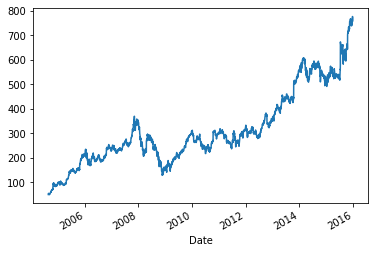

In [53]:
import matplotlib.pyplot as plt
goog_close = goog['Close']
goog_close.plot()

One common need for time series data is resampling at a higher or lower frequency. This can be done using the resample() method, or the much simpler asfreq() method. The primary difference between the two is that resample() is fundamentally a data aggregation, while asfreq() is fundamentally a data selection.

Taking a look at the Google closing price, let's compare what the two return when we down-sample the data. Here we will resample the data at the end of business year:

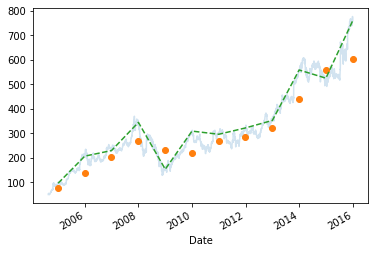

In [54]:
goog_close.plot(alpha=0.2, style='-')
goog_close.resample('BA').mean().plot(style='o')  #BA = Business Year End
goog_close.asfreq('BA').plot(style='--')

#Notice the difference: at each point, resample reports the average 
#of the previous year, while asfreq reports the value at the end of the 
#year.


In [55]:
#difference between resample and asfreq
ts = pd.Series(range(365), index = pd.date_range(start='20190101', 
                                                end='20191231',
                                                freq = 'D'))
ts.head()

2019-01-01    0
2019-01-02    1
2019-01-03    2
2019-01-04    3
2019-01-05    4
Freq: D, dtype: int64

In [56]:
ts.asfreq(freq='Q')  #Quarter

2019-03-31     89
2019-06-30    180
2019-09-30    272
2019-12-31    364
Freq: Q-DEC, dtype: int64

In [57]:
#this is not the average of each quarter, but the average of the last
#day of each quarter
ts.asfreq(freq='Q').mean()   #(89+180+272+364)/4

226.25

In [58]:
bins = ts.resample('Q')  #return DateTimeIndexResampler which is like GroupBy object
#it actually create some groups

#this is actually the average of each quarter
bins.groups
bins.mean()  #think of resample as groupby, (you can call mean, sum, apply, just like group by)

2019-03-31     44.5
2019-06-30    135.0
2019-09-30    226.5
2019-12-31    318.5
Freq: Q-DEC, dtype: float64

Pandas has two closely related methods: shift() and tshift() In short, the difference between them is that shift() shifts the data, while tshift() shifts the index. In both cases, the shift is specified in multiples of the frequency.  Here we will both shift() and tshift() by 900 days;

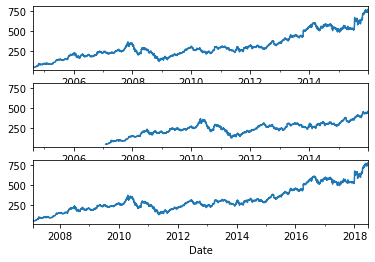

In [59]:
fig, ax = plt.subplots(3, sharey=True)

goog_close = goog_close.asfreq('D', method='pad')

goog_close.plot(ax=ax[0])
goog_close.shift(900).plot(ax=ax[1])  #shift the data
goog_close.tshift(900).plot(ax=ax[2])  #simply shift the index

'\nThis helps us to see the overall trend in Google stock: \nthus far, the most profitable times to invest in Google \nhave been (unsurprisingly, in retrospect) shortly after its IPO, and \nin the middle of the 2009 recession.\n'

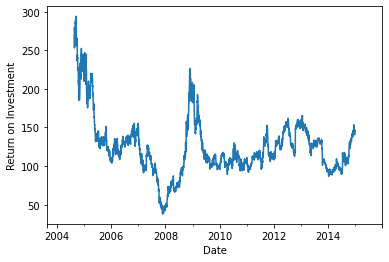

In [60]:
#why shift?
#A common context for this type of shift is in computing differences 
#over time. For example, we use shifted values to compute the one-year 
#return on investment for Google stock over the course of the dataset:
ROI = 100 * (goog_close.tshift(-365) / goog_close)
ROI.plot()
plt.ylabel('Return on Investment')

'''
This helps us to see the overall trend in Google stock: 
thus far, the most profitable times to invest in Google 
have been (unsurprisingly, in retrospect) shortly after its IPO, and 
in the middle of the 2009 recession.
'''

In [61]:
## Rolling window
rolling = goog_close.rolling(365, center = True)
rolling

Rolling [window=365,center=True,axis=0]

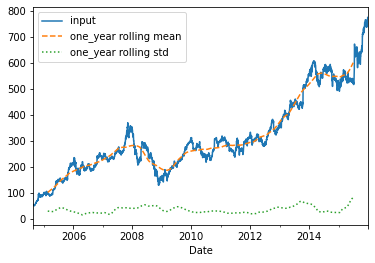

In [62]:
data = pd.DataFrame({'input': goog_close,
                   'one_year rolling mean': rolling.mean(),
                   'one_year rolling std': rolling.std()})

data.plot(style=['-', '--', ':'])

In [63]:
#Example: Visualizing Seattle Bicycle Counts
data = pd.read_csv('resources/FremontBridge.csv')
data.head()

data = pd.read_csv('resources/FremontBridge.csv', index_col='Date',
                  parse_dates=True)

In [64]:
data.columns = ['West', 'East']  #rename
data.head()

,West,East
Date,,
2019-03-31 23:00:00,6.0,10.0
2019-03-31 22:00:00,7.0,14.0
2019-03-31 21:00:00,18.0,15.0
2019-03-31 20:00:00,26.0,31.0
2019-03-31 19:00:00,30.0,58.0


In [65]:
#check any missing values
data.isna().sum()

#fillna with 0
data.fillna(0, inplace=True)

#feature engineering
data['Total'] = data['East'] + data['West']

In [66]:
data.head()

,West,East,Total
Date,,,
2019-03-31 23:00:00,6.0,10.0,16.0
2019-03-31 22:00:00,7.0,14.0,21.0
2019-03-31 21:00:00,18.0,15.0,33.0
2019-03-31 20:00:00,26.0,31.0,57.0
2019-03-31 19:00:00,30.0,58.0,88.0


Text(0, 0.5, 'Weekly bicycle count')

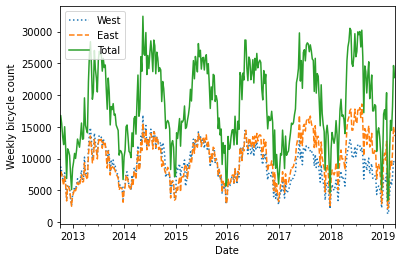

In [67]:
#let do some plot, checking on weekly trend

import matplotlib.pyplot as plt
import numpy as np

weekly = data.resample('W').agg('sum')  #can also do .sum()
weekly.plot(style=[":", "--", '-'])
plt.ylabel('Weekly bicycle count')

#seems like people bicycle in summer more than winter

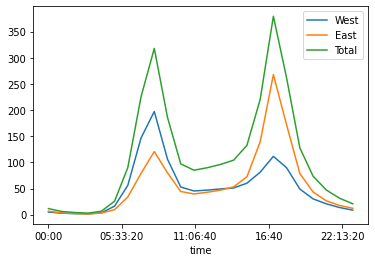

In [68]:
#let's look at what time people usually bicycle
by_time = data.groupby(data.index.time).mean()
by_time.plot()
# hourly_ticks = 4 * 60 * 60 * np.arange(6)   #every four hours
# by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

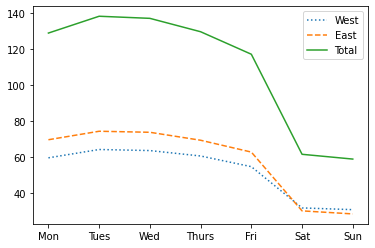

In [69]:
#how about days?
by_day = data.groupby(data.index.dayofweek).mean()
by_day.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_day.plot(style=[':', '--', '-'])